In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import qnm
import pandas as pd

In [18]:
def create_bru_values(m_odd, em, M, a, n_ref):
    
    """ 
    m_odd is odd integer, g_s is string coupling (GR == 1), em is 2,
    M is total mass, a is dimensionless spin, and amplitude_qnm is 
    the amplitude of the mode of interest 
    
    returns amplitude (quantum), omega_real, tau, and tp
    
    """
    
    g_s = 1/n_ref
    c = 3e8
    G = 6.67e-11
    Msun = 1.989e30
    
    conversion_w = (c**3)/(G * M * Msun)
    R_con = (2 * G * M * Msun) / (c**2)
    
    r_s = (R_con + np.sqrt((R_con**2) - 4*(a**2)))/2 #units m
    omega_real = (m_odd * np.pi /(2 * r_s * n_ref)) * c   #units 1/m --> 1/s
    omega_im = - (1/r_s) * (1/(n_ref**2)) * c
    
    tau = 1/omega_im
    tp = 1/omega_real 
    
    #print("Q freq is {}".format(omega_real/(2*np.pi)))
    #print("Q tau is {}".format(tau))
    
    return {'omega_real_Q': omega_real, 'omega_img_Q': omega_im,
            'tau_Q': tau, 'tp_Q': tp, 'freq_Q': (omega_real/(2*np.pi))}

In [19]:
def create_GR_values(l, m, s, a, n=0):
    
    """
    grabs GR values to compare to quantum values
    
    returns dictionary 
    
    """
    
    c = 3e8
    G = 6.67e-11
    Msun = 1.989e30
    
    
    grav = qnm.modes_cache(s=s,l=l,m=m,n=n)
    omega_GR, _, _ = grav(a=a)
    
    omega_real_GR = omega_GR.real 
    omega_im_GR = omega_GR.imag

    print("GR freq {} is {}".format([l,m],omega_real_GR/(2*np.pi)))

    
    return {'omega_real_GR': omega_real_GR, 'omega_imag_GR': omega_im_GR}

GR freq [2, 2] is 0.08476596145309187
GR freq [2, 1] is 0.07243483411293225
GR freq [2, 0] is 0.06272762466640135
GR freq [3, 3] is 0.13427693454227776


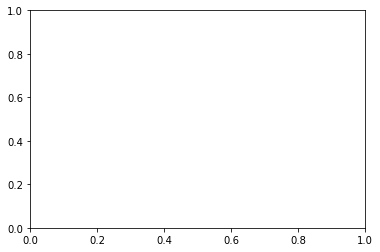

In [39]:
#spin 0.1, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30

a=0.7

GR_values22 = create_GR_values(l=2,m=2,s=-2,a=a)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=a)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=a)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=a)

fig, ax = plt.subplots()
df= pd.DataFrame(columns={'Mass','GR_22_freq', 'GR_22_tau', 'GR_21_freq', 'GR_21_tau', 'GR_20_freq', 
                          'GR_20_tau','GR_33_freq', 'GR_33_tau', 'Q_freq', 'Q_tau'})

for M in np.arange(10,200,0.1):
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=a, n_ref=3)
    frequency_q=bru_values['freq_Q']
    tau_q=bru_values['tau_Q']
    
    GR_22f=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21f=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20f=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33f=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    GR_22t=GR_values22['omega_imag_GR']*mass_conversion
    GR_21t=GR_values21['omega_imag_GR']*mass_conversion
    GR_20t=GR_values20['omega_imag_GR']*mass_conversion
    GR_33t=GR_values33['omega_imag_GR']*mass_conversion
    
    df=df.append({'Mass':M,'GR_22_freq':GR_22f, 'GR_22_tau':GR_22t, 'GR_21_freq':GR_21f, 
                 'GR_21_tau':GR_21t, 'GR_20_freq':GR_20f, 'GR_20_tau':GR_20t,
                 'GR_33_freq':GR_33f, 'GR_33_tau':GR_33t, 'Q_freq':frequency_q, 'Q_tau':tau_q}, ignore_index=True)

Text(0.5, 1.0, 'nref = 3, spin = 0.7')

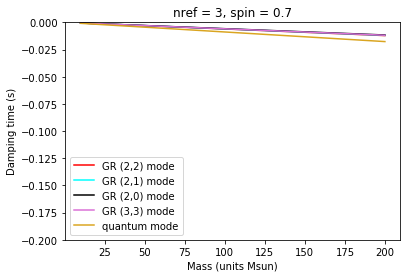

In [40]:
plt.plot(df['Mass'], 1/df['GR_22_tau'], label='GR (2,2) mode', color='red')
plt.plot(df['Mass'], 1/df['GR_21_tau'], label='GR (2,1) mode', color='cyan')
plt.plot(df['Mass'], 1/df['GR_20_tau'], label='GR (2,0) mode', color='black')
plt.plot(df['Mass'], 1/df['GR_33_tau'], label='GR (3,3) mode', color='orchid')
plt.plot(df['Mass'], df['Q_tau'], label='quantum mode', color='goldenrod')
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.legend()
plt.xlabel('Mass (units Msun)')
plt.ylabel('Damping time (s)')
plt.ylim(-0.2,0)
plt.title('nref = 3, spin = 0.7')

In [ ]:

    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 3, spin = 0.1')
plt.savefig('/Users/zohaggard/Desktop/new/spin01_nref3.png')       
#plt.show()

GR freq [2, 2] is 0.07386747378683875
GR freq [2, 1] is 0.06694572457689524
GR freq [2, 0] is 0.06100699840077839
GR freq [3, 3] is 0.1179212551342532
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.5

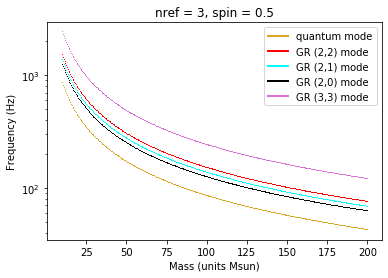

In [20]:
#spin 0.5, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.5)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.5)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.5)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.5)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.5, n_ref=3)
    frequency_q=bru_values['freq_Q']
    
    GR_22=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 3, spin = 0.5')
plt.savefig('/Users/zohaggard/Desktop/mass_plots/spin05_nref3.png')
plt.show()

GR freq [2, 2] is 0.08476596145309187
GR freq [2, 1] is 0.07243483411293225
GR freq [2, 0] is 0.06272762466640135
GR freq [3, 3] is 0.13427693454227776
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.

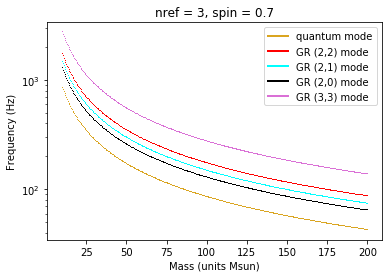

In [22]:
#spin 0.5, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.7)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.7)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.7)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.7)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.7, n_ref=3)
    frequency_q=bru_values['freq_Q']
    
    GR_22=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 3, spin = 0.7')
plt.savefig('/Users/zohaggard/Desktop/mass_plots/spin07_nref3.png')
plt.show()

GR freq [2, 2] is 0.06159575429427787
GR freq [2, 1] is 0.0605476738934924
GR freq [2, 0] is 0.059529007954205716
GR freq [3, 3] is 0.09880269035879936
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.

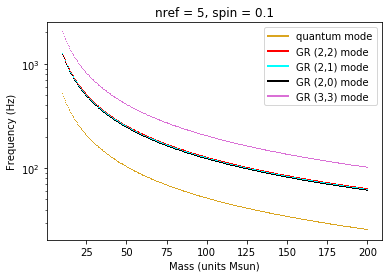

In [24]:
#spin 0.5, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.1)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.1)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.1)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.1)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.1, n_ref=5)
    frequency_q=bru_values['freq_Q']
    
    GR_22=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 5, spin = 0.1')
plt.savefig('/Users/zohaggard/Desktop/mass_plots/spin01_nref5.png')
plt.show()

GR freq [2, 2] is 0.07386747378683875
GR freq [2, 1] is 0.06694572457689524
GR freq [2, 0] is 0.06100699840077839
GR freq [3, 3] is 0.1179212551342532
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.5

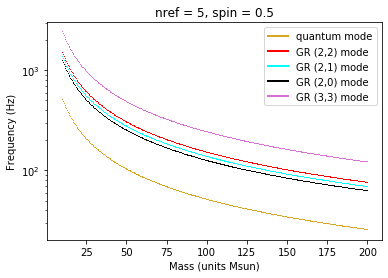

In [25]:
#spin 0.5, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.5)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.5)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.5)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.5)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.5, n_ref=5)
    frequency_q=bru_values['freq_Q']
    
    GR_22=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 5, spin = 0.5')
plt.savefig('/Users/zohaggard/Desktop/mass_plots/spin05_nref5.png')
plt.show()

GR freq [2, 2] is 0.08476596145309187
GR freq [2, 1] is 0.07243483411293225
GR freq [2, 0] is 0.06272762466640135
GR freq [3, 3] is 0.13427693454227776
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.

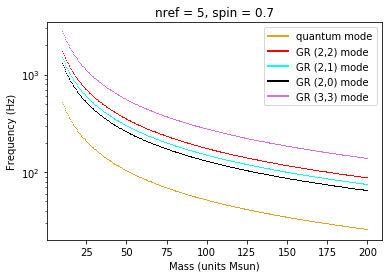

In [26]:
#spin 0.5, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.7)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.7)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.7)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.7)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.7, n_ref=5)
    frequency_q=bru_values['freq_Q']
    
    GR_22=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 5, spin = 0.7')
plt.savefig('/Users/zohaggard/Desktop/mass_plots/spin07_nref5.png')
plt.show()

GR freq [2, 2] is 0.06159575429427787
GR freq [2, 1] is 0.0605476738934924
GR freq [2, 0] is 0.059529007954205716
GR freq [3, 3] is 0.09880269035879936
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.

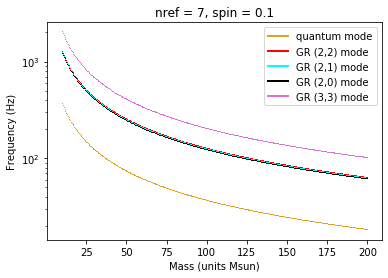

In [27]:
#spin 0.5, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.1)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.1)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.1)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.1)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.1, n_ref=7)
    frequency_q=bru_values['freq_Q']
    
    GR_22=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 7, spin = 0.1')
plt.savefig('/Users/zohaggard/Desktop/mass_plots/spin01_nref7.png')
plt.show()

GR freq [2, 2] is 0.07386747378683875
GR freq [2, 1] is 0.06694572457689524
GR freq [2, 0] is 0.06100699840077839
GR freq [3, 3] is 0.1179212551342532
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.5

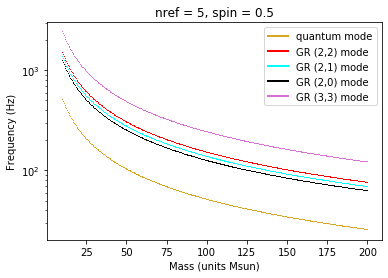

In [28]:
#spin 0.5, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.5)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.5)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.5)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.5)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.5, n_ref=5)
    frequency_q=bru_values['freq_Q']
    
    GR_22=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 5, spin = 0.5')
plt.savefig('/Users/zohaggard/Desktop/mass_plots/spin05_nref5.png')
plt.show()

GR freq [2, 2] is 0.08476596145309187
GR freq [2, 1] is 0.07243483411293225
GR freq [2, 0] is 0.06272762466640135
GR freq [3, 3] is 0.13427693454227776
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.

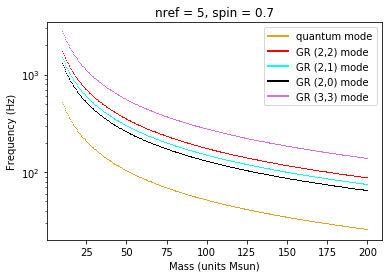

In [29]:
#spin 0.5, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.7)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.7)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.7)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.7)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.7, n_ref=5)
    frequency_q=bru_values['freq_Q']
    
    GR_22=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 5, spin = 0.7')
plt.savefig('/Users/zohaggard/Desktop/mass_plots/spin07_nref5.png')
plt.show()

GR freq [2, 2] is 0.07386747378683875
GR freq [2, 1] is 0.06694572457689524
GR freq [2, 0] is 0.06100699840077839
GR freq [3, 3] is 0.1179212551342532
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.5

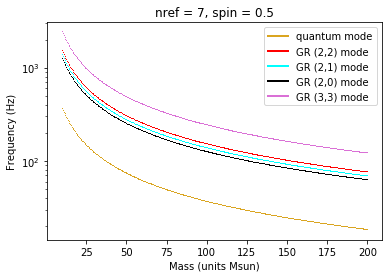

In [30]:
#spin 0.5, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.5)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.5)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.5)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.5)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.5, n_ref=7)
    frequency_q=bru_values['freq_Q']
    
    GR_22=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 7, spin = 0.5')
plt.savefig('/Users/zohaggard/Desktop/mass_plots/spin05_nref7.png')
plt.show()

GR freq [2, 2] is 0.08476596145309187
GR freq [2, 1] is 0.07243483411293225
GR freq [2, 0] is 0.06272762466640135
GR freq [3, 3] is 0.13427693454227776
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.

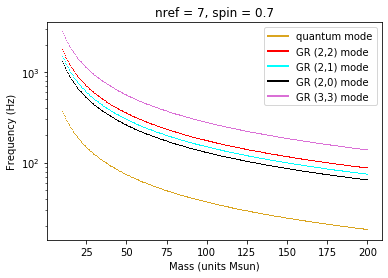

In [31]:
#spin 0.5, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.7)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.7)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.7)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.7)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.7, n_ref=7)
    frequency_q=bru_values['freq_Q']
    
    GR_22=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 7, spin = 0.7')
plt.savefig('/Users/zohaggard/Desktop/mass_plots/spin07_nref7.png')
plt.show()

GR freq [2, 2] is 0.08476596145309187
GR freq [2, 1] is 0.07243483411293225
GR freq [2, 0] is 0.06272762466640135
GR freq [3, 3] is 0.13427693454227776
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.

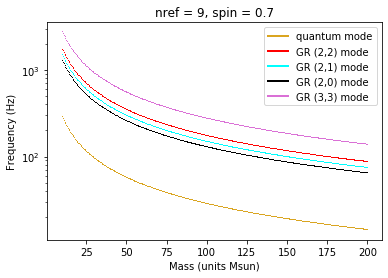

In [32]:
#spin 0.5, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.7)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.7)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.7)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.7)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.7, n_ref=9)
    frequency_q=bru_values['freq_Q']
    
    GR_22=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 9, spin = 0.7')
plt.savefig('/Users/zohaggard/Desktop/mass_plots/spin07_nref9.png')
plt.show()

GR freq [2, 2] is 0.07386747378683875
GR freq [2, 1] is 0.06694572457689524
GR freq [2, 0] is 0.06100699840077839
GR freq [3, 3] is 0.1179212551342532
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.5

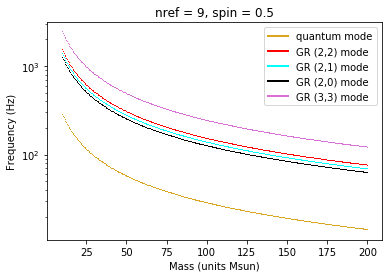

In [33]:
#spin 0.5, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.5)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.5)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.5)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.5)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.5, n_ref=9)
    frequency_q=bru_values['freq_Q']
    
    GR_22=GR_values22['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_21=GR_values21['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_20=GR_values20['omega_real_GR']*mass_conversion/(2*np.pi)
    GR_33=GR_values33['omega_real_GR']*mass_conversion/(2*np.pi)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.yscale('log')
plt.title('nref = 9, spin = 0.5')
plt.savefig('/Users/zohaggard/Desktop/mass_plots/spin05_nref9.png')
plt.show()

GR freq [2, 2] is 0.06159575429427787
GR freq [2, 1] is 0.0605476738934924
GR freq [2, 0] is 0.059529007954205716
GR freq [3, 3] is 0.09880269035879936
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.

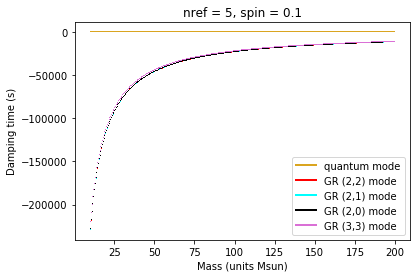

In [15]:
c = 3e8
G = 6.67e-11
Msun = 1.989e30
a=0.1
nref=5

GR_values22 = create_GR_values(l=2,m=2,s=-2,a=a)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=a)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=a)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=a)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=a, n_ref=nref)
    frequency_q=bru_values['tau_Q']
    
    GR_22=(1/GR_values22['omega_imag_GR']*mass_conversion)
    GR_21=(1/GR_values21['omega_imag_GR']*mass_conversion)
    GR_20=(1/GR_values20['omega_imag_GR']*mass_conversion)
    GR_33=(1/GR_values33['omega_imag_GR']*mass_conversion)
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Damping time (s)')
#plt.yscale('log')
plt.title('nref = {}, spin = {}'.format(nref, a))
plt.savefig('/Users/zohaggard/Desktop/mass_plotstau/TAUspin01_nref5.png')
plt.show()

#plot frequency vs. n_ref. w/ mass on colorbar
c = 3e8
G = 6.67e-11
Msun = 1.989e30

df=pd.DataFrame(columns={'Mass','n ref','frequency','tau'})
for n_ref in np.arrange([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    for M in [20,30, 40, 50, 60, 70, 80, 90, 100, 110, 120,130,140,150]:
        mass_conversion = (c**3)/(G * M * Msun)
        bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.1, n_ref=n_ref)
        frequency_q=bru_values['freq_Q']
        damping_time=bru_values['tau_Q']
    
        df=df.append({'Mass':M,'n ref':n_ref,'frequency':frequency_q,'tau':damping_time},ignore_index=True)

In [46]:
df

,n_ref,frequency,tau,Mass
0,2.0,635.994220,-0.000786,20.0
1,2.0,423.996147,-0.001179,30.0
2,2.0,317.997110,-0.001572,40.0
3,2.0,254.397688,-0.001965,50.0
4,2.0,211.998073,-0.002359,60.0
5,2.0,181.712634,-0.002752,70.0
6,2.0,158.998555,-0.003145,80.0
7,2.0,141.332049,-0.003538,90.0
8,2.0,127.198844,-0.003931,100.0
9,2.0,115.635313,-0.004324,110.0


Text(0.5, 0, 'Refractive index, n')

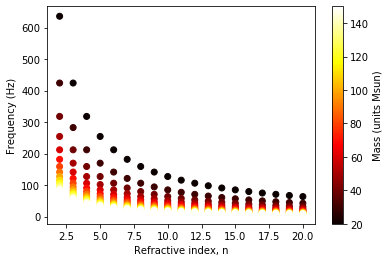

In [16]:
ax=plt.scatter(x=df['n ref'], y=df['frequency'],c=df['Mass'],cmap='hot')
cbar = plt.colorbar()
plt.clim()
cbar.set_label('Mass (units Msun)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Refractive index, n')

Text(0.5, 0, 'Refractive index, n')

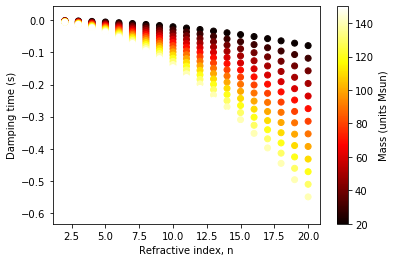

In [18]:
ax=plt.scatter(x=df['n ref'], y=df['tau'],c=df['Mass'],cmap='hot')
cbar = plt.colorbar()
plt.clim()
cbar.set_label('Mass (units Msun)')
plt.ylabel('Damping time (s)')
plt.xlabel('Refractive index, n')

GR freq [2, 2] is 0.06159575429427787
GR freq [2, 1] is 0.0605476738934924
GR freq [2, 0] is 0.059529007954205716
GR freq [3, 3] is 0.09880269035879936
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.

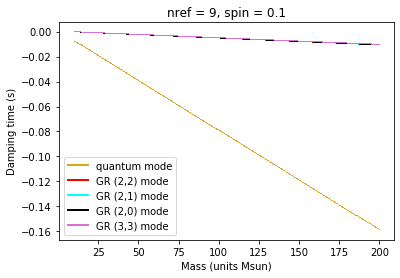

In [11]:
#spin 0.1, n_ref=3
c = 3e8
G = 6.67e-11
Msun = 1.989e30


GR_values22 = create_GR_values(l=2,m=2,s=-2,a=0.1)
GR_values21 = create_GR_values(l=2,m=1,s=-2,a=0.1)
GR_values20 = create_GR_values(l=2,m=0,s=-2,a=0.1)
GR_values33 = create_GR_values(l=3,m=3,s=-2,a=0.1)

fig, ax = plt.subplots()

for M in np.arange(10,200,0.5):
    print(M)
    mass_conversion = (c**3)/(G * M * Msun)
    bru_values=create_bru_values(m_odd=1, em=2, M=M, a=0.1, n_ref=9)
    frequency_q=bru_values['tau_Q']
    
    GR_22=GR_values22['omega_imag_GR']*mass_conversion
    GR_21=GR_values21['omega_imag_GR']*mass_conversion
    GR_20=GR_values20['omega_imag_GR']*mass_conversion
    GR_33=GR_values33['omega_imag_GR']*mass_conversion
    
    plt.plot(M, frequency_q, ',', label='quantum mode', color='goldenrod')
    plt.plot(M, 1/GR_22, ',', label='GR (2,2) mode', color='red')
    plt.plot(M, 1/GR_21, ',', label='GR (2,1) mode', color='cyan')
    plt.plot(M, 1/GR_20, ',', label='GR (2,0) mode', color='black')
    plt.plot(M, 1/GR_33, ',', label='GR (3,3) mode', color='orchid')
    
    
custom_lines = [Line2D([0], [0], color='goldenrod', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='cyan', lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='orchid', lw=2)]
ax.legend(custom_lines, ['quantum mode','GR (2,2) mode','GR (2,1) mode','GR (2,0) mode','GR (3,3) mode'])
plt.xlabel('Mass (units Msun)')
plt.ylabel('Damping time (s)')
plt.title('nref = 9, spin = 0.1')
plt.savefig('/Users/zohaggard/Desktop/spin01_nref9_damp.png')       
plt.show()